In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [11]:
digits_dataset = load_digits()

In [12]:
print("Ключи digits_dataset: \n{}".format(digits_dataset.keys()))

Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [13]:
print(digits_dataset['DESCR'][:1000] + "\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [14]:
print("Названия ответов: {}".format(digits_dataset['target_names']))

Названия ответов: [0 1 2 3 4 5 6 7 8 9]


In [15]:
print("Названия признаков: \n{}".format(digits_dataset['feature_names']))

Названия признаков: 
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [16]:
print("Тип массива data: {}".format(type(digits_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [17]:
print("Форма массива data: {}".format(digits_dataset['data'].shape))

Форма массива data: (1797, 64)


In [18]:
print("Первые 5 строк массива: \n{}".format(digits_dataset['data'][:150]))

Первые 5 строк массива: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  3. ... 10.  1.  0.]
 [ 0.  0.  6. ...  9.  1.  0.]]


In [19]:
print("Тип массива target: {}".format(type(digits_dataset['target'])))
print("Форма массива target: {}".format(digits_dataset['target'].shape))
print("Ответы:\n{}".format(digits_dataset['target']))

Тип массива target: <class 'numpy.ndarray'>
Форма массива target: (1797,)
Ответы:
[0 1 2 ... 8 9 8]


In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=0)

In [35]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (1347, 64)
Форма массива y_train: (1347,)


In [36]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_test: (450, 64)
Форма массива y_test: (450,)


Названия ответов: [0 1 2 3 4 5 6 7 8 9]
Информация об атрибутах: Изображение 8×8 целых пикселей в диапазоне 0..16.


C:\Users\berme\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\berme\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\berme\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\berme\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
po

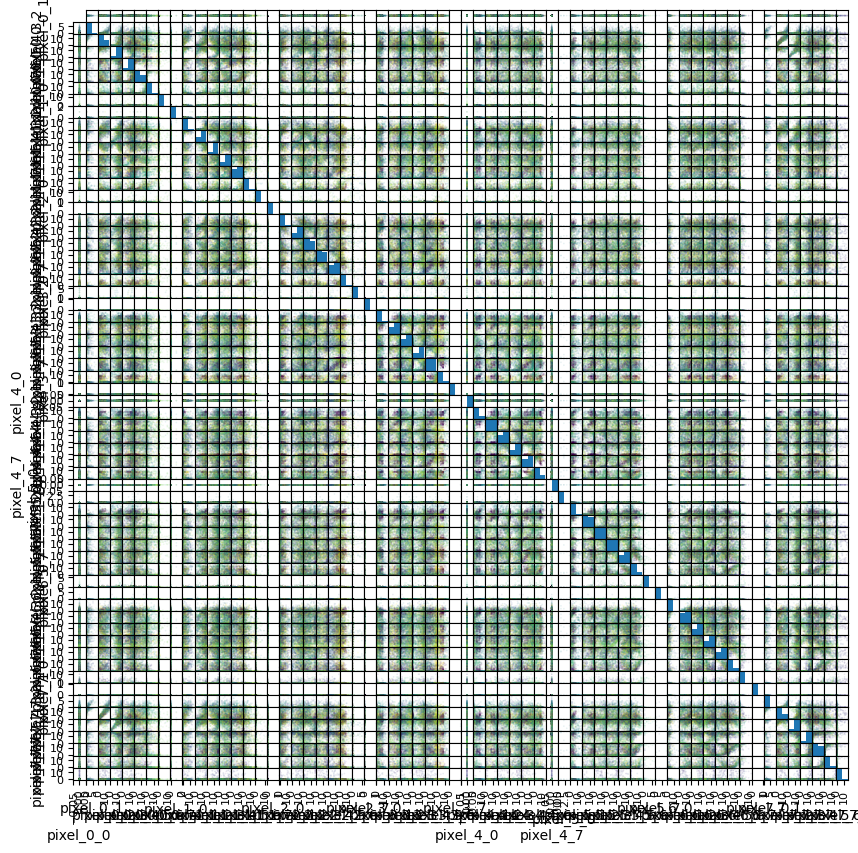

In [40]:
import numpy as np
digits_dataframe = pd.DataFrame(X_train,columns=digits_dataset.feature_names)
grr = pd.plotting.scatter_matrix(digits_dataframe,c=y_train,figsize=(10,10),marker='.',hist_kwds={'bins':2},s=6,alpha=.1)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [73]:
import numpy as np

X_new_sample = np.array([[3.0, 0.1, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 13.0, 6.0, 15.0, 4.0, 0.0, 0.0, 0.0,
                          2.0, 1.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 11.0, 1.0, 0.2, 0.0, 0.0, 0.0, 0.0,
                          1.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 8.0, 0.0, 0.0, 0.2, 8.0, 4.0, 5.0,
                          12.0, 8.0, 0.0, 0.0, 0.0, 7.0, 13.0, 13.0, 9.0, 0.4]])
print('shape of X_new_sample sample {}'.format(X_new_sample.shape))

X_new = np.array([[0.0, 0.5, 0.7, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.8, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0,
                   0.5, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.2, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.6, 0.0, 0.0, 0.6, 0.5,
                   0.4, 0.3, 0.2, 0.1]])
print('shape of X_new sample {}'.format(X_new.shape))

shape of X_new_sample sample (1, 64)
shape of X_new sample (1, 64)


In [12]:
X = digits_dataset.data
y = digits_dataset.target

In [13]:
X_train , X_test, y_train,y_test = train_test_split(digits_dataset['data'],digits_dataset['target'],random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = 1 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [17]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))

форма массива X_new: (1, 4)


In [24]:
y_pred = knn.predict(X_test)
print(len(y_pred))
print((y_pred))

450
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


Главная цель - построение модели машинного обучения, где Функция load_digits предназначена для загрузки набора данных. Набор данных содержит изображения рукописных цифр: 10 классов, где каждый класс относится к цифре.Оптическое распознавание символов (OCR) – это процесс преобразования изображения текста в машиночитаемый текстовый формат.
Набор данных Digits состоит из двух массивов NumPy: один содержит данные и в scikit-
learn обозначается как X, другой содержит правильные или нужные ответы и
обозначается как y. Массив Х представляет собой двумерный массив признаков, в
котором одна строка соответствует одной точке данных, а один столбец – одному
признаку.

В данном контексте мы применили алгоритм классификации "k ближайших соседей". Этот алгоритм работает следующим образом: он анализирует ближайших соседей новой точки данных в обучающем наборе и принимает решение на основе классов (или меток) этих соседей. Для реализации этого алгоритма, мы воспользовались классом KNeighborsClassifier, который предоставляет инструменты как для построения модели, так и для генерации прогнозов.

Для начала, мы создали экземпляр класса KNeighborsClassifier и настроили его параметры в соответствии с нашей задачей. Затем, мы применили метод fit, передав обучающие данные (X_train) и соответствующие обучающие ответы (y_train) в качестве аргументов. Этот шаг позволил построить модель, которая учитывает обучающие данные.

Далее, для оценки качества модели, мы использовали метод score, который автоматически вычисляет "правильность" (accuracy) модели. Этот метод был применен к тестовым данным и соответствующим тестовым ответам. Результат оценки показал, что наша модель достигает точности около 99%.

Итак, в результате мы успешно применили алгоритм k ближайших соседей, обучили модель на обучающих данных, и оценили ее производительность на тестовых данных, где она продемонстрировала высокую точность прогнозов.